# Chapter 5 - Machine Learning

In [3]:
## Import Libraries and Data:

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Check Missing Values and Types:

In [5]:
import matplotlib
from matplotlib import rc
font = {'size'   : 16}
matplotlib.rc('font', **font)

In [6]:
df = pd.read_csv('BASESignosANX.csv', sep=';')

In [7]:
df.head()

,Género,Edad,Años de educación formal,HADS - Ansiedad,HADS - Depresión,HADS,Corte en 8,ZUNG,Corte en 36,RMET,...,Puntos TASIT,Global ANX,Global,SIntomas ANX,PRKCA,TCF4,CDH20,GRID1,GABBR1,SNCA
0,1,24,11,17,9,26,0,57,1,12,...,8,74,1,8,2,2,1,2,1,2
1,1,23,15,8,2,10,0,47,1,12,...,7,55,1,5,3,1,1,1,1,1
2,0,26,17,7,2,9,0,33,0,12,...,9,40,0,4,3,2,2,1,1,1
3,0,34,18,7,4,11,0,33,0,9,...,8,40,0,4,3,1,2,1,2,1
4,0,29,11,3,4,7,1,36,1,11,...,8,39,0,2,2,1,2,1,1,3


In [8]:
df.describe()

,Género,Edad,Años de educación formal,HADS - Ansiedad,HADS - Depresión,HADS,Corte en 8,ZUNG,Corte en 36,RMET,...,Puntos TASIT,Global ANX,Global,SIntomas ANX,PRKCA,TCF4,CDH20,GRID1,GABBR1,SNCA
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.650888,25.443787,14.739645,8.112426,4.609467,12.721893,0.289941,39.591716,0.633136,11.224852,...,8.467456,47.704142,0.568047,3.928994,2.390533,1.704142,2.130178,1.236686,1.307692,1.591716
std,0.478106,9.352780,2.899656,4.269816,3.366700,6.918716,0.455083,9.390607,0.483381,2.321555,...,1.154884,12.997987,0.496820,2.610815,0.588707,0.651039,0.711873,0.440052,0.500000,0.727145
min,0.000000,18.000000,11.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,2.000000,...,4.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,20.000000,12.000000,5.000000,2.000000,7.000000,0.000000,33.000000,0.000000,10.000000,...,8.000000,38.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,23.000000,15.000000,8.000000,4.000000,12.000000,0.000000,38.000000,1.000000,12.000000,...,9.000000,47.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,26.000000,16.000000,11.000000,7.000000,17.000000,1.000000,46.000000,1.000000,13.000000,...,9.000000,56.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000
max,1.000000,73.000000,26.000000,18.000000,15.000000,31.000000,1.000000,65.000000,1.000000,16.000000,...,10.000000,81.000000,1.000000,8.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [9]:
df.dtypes

Género                      int64
Edad                        int64
Años de educación formal    int64
HADS - Ansiedad             int64
HADS - Depresión            int64
HADS                        int64
Corte en 8                  int64
ZUNG                        int64
Corte en 36                 int64
RMET                        int64
Lista SVE                   int64
Z- TRANS COMP FÍSICO        int64
Z- TRANSF COMP MENT         int64
NOrmal_pobla comp Fisi      int64
NOrmal_pobla comp Ment      int64
Hayling_A_Puntaje           int64
Hayling_A_Tiempo            int64
Hayling_B_Puntaje           int64
Hayling_B_Tiempo            int64
Hayling Ajustado (A-B)      int64
Dígitos adelante            int64
Dígitos atrás               int64
Dígitos total               int64
Letras P                    int64
Letras M                    int64
Total Fluidez Verbal        int64
Puntos TASIT                int64
Global ANX                  int64
Global                      int64
SIntomas ANX  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Género                    169 non-null    int64
 1   Edad                      169 non-null    int64
 2   Años de educación formal  169 non-null    int64
 3   HADS - Ansiedad           169 non-null    int64
 4   HADS - Depresión          169 non-null    int64
 5   HADS                      169 non-null    int64
 6   Corte en 8                169 non-null    int64
 7   ZUNG                      169 non-null    int64
 8   Corte en 36               169 non-null    int64
 9   RMET                      169 non-null    int64
 10  Lista SVE                 169 non-null    int64
 11  Z- TRANS COMP FÍSICO      169 non-null    int64
 12  Z- TRANSF COMP MENT       169 non-null    int64
 13  NOrmal_pobla comp Fisi    169 non-null    int64
 14  NOrmal_pobla comp Ment    169 non-null    

In [11]:
# df['concave points_worst'] = df['concave points_worst'].astype(float) # Will error out

In [12]:
#df['Codigo Int.'] = df['Codigo Int.'].astype(str)

In [13]:
df.dtypes

Género                      int64
Edad                        int64
Años de educación formal    int64
HADS - Ansiedad             int64
HADS - Depresión            int64
HADS                        int64
Corte en 8                  int64
ZUNG                        int64
Corte en 36                 int64
RMET                        int64
Lista SVE                   int64
Z- TRANS COMP FÍSICO        int64
Z- TRANSF COMP MENT         int64
NOrmal_pobla comp Fisi      int64
NOrmal_pobla comp Ment      int64
Hayling_A_Puntaje           int64
Hayling_A_Tiempo            int64
Hayling_B_Puntaje           int64
Hayling_B_Tiempo            int64
Hayling Ajustado (A-B)      int64
Dígitos adelante            int64
Dígitos atrás               int64
Dígitos total               int64
Letras P                    int64
Letras M                    int64
Total Fluidez Verbal        int64
Puntos TASIT                int64
Global ANX                  int64
Global                      int64
SIntomas ANX  

In [14]:
df.isna().values.sum()

0

In [15]:
df.shape

(169, 36)

In [16]:
df.dropna().shape

(169, 36)

In [17]:
df = df.dropna()
df.head(3)

,Género,Edad,Años de educación formal,HADS - Ansiedad,HADS - Depresión,HADS,Corte en 8,ZUNG,Corte en 36,RMET,...,Puntos TASIT,Global ANX,Global,SIntomas ANX,PRKCA,TCF4,CDH20,GRID1,GABBR1,SNCA
0,1,24,11,17,9,26,0,57,1,12,...,8,74,1,8,2,2,1,2,1,2
1,1,23,15,8,2,10,0,47,1,12,...,7,55,1,5,3,1,1,1,1,1
2,0,26,17,7,2,9,0,33,0,12,...,9,40,0,4,3,2,2,1,1,1


#### Check Output Balance:

In [18]:
df['Global'].value_counts()

Global
1    96
0    73
Name: count, dtype: int64

<Axes: xlabel='Corte en 36', ylabel='count'>

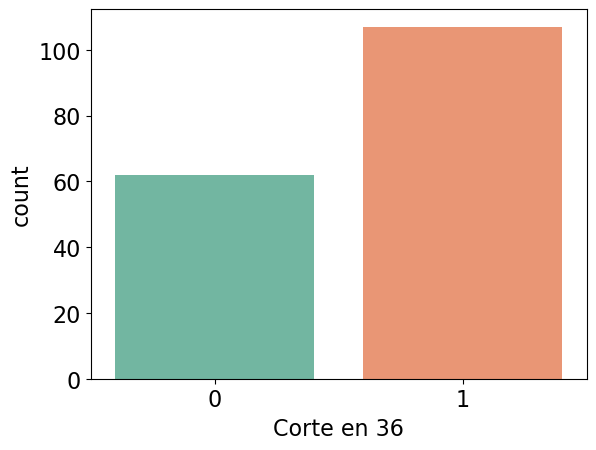

In [19]:
sns.countplot(df, x='Corte en 36', palette = "Set2")

In [20]:
df.columns

Index(['Género', 'Edad', 'Años de educación formal', 'HADS - Ansiedad',
       'HADS - Depresión', 'HADS', 'Corte en 8', 'ZUNG', 'Corte en 36', 'RMET',
       'Lista SVE', 'Z- TRANS COMP FÍSICO', 'Z- TRANSF COMP MENT',
       'NOrmal_pobla comp Fisi', 'NOrmal_pobla comp Ment', 'Hayling_A_Puntaje',
       'Hayling_A_Tiempo', 'Hayling_B_Puntaje', 'Hayling_B_Tiempo',
       'Hayling Ajustado (A-B)', 'Dígitos adelante', 'Dígitos atrás',
       'Dígitos total', 'Letras P', 'Letras M', 'Total Fluidez Verbal',
       'Puntos TASIT', 'Global ANX', 'Global', 'SIntomas ANX', 'PRKCA', 'TCF4',
       'CDH20', 'GRID1', 'GABBR1', 'SNCA'],
      dtype='object')

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


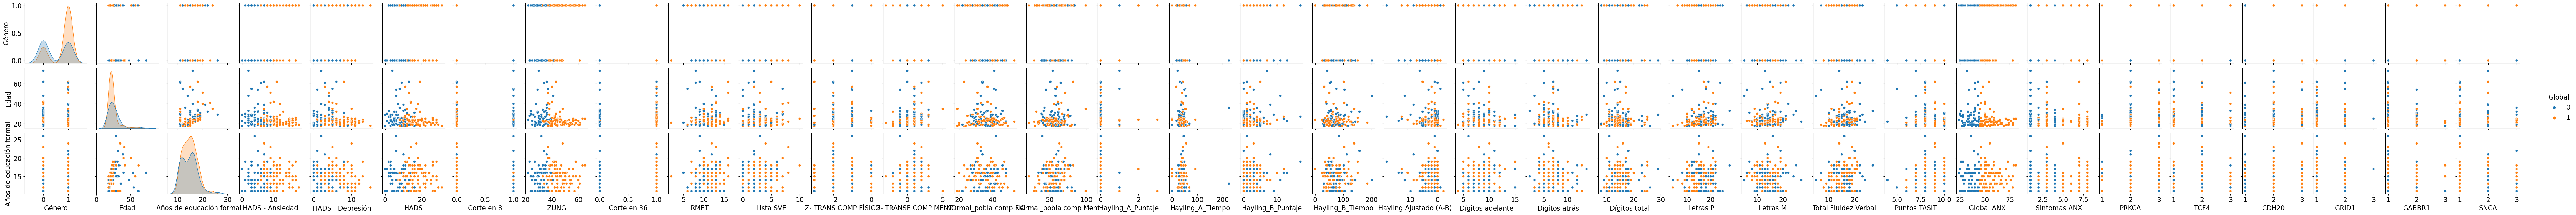

In [21]:
sns.pairplot(df, y_vars=('Género', 'Edad', 'Años de educación formal'), hue="Global")

In [22]:
df.columns

Index(['Género', 'Edad', 'Años de educación formal', 'HADS - Ansiedad',
       'HADS - Depresión', 'HADS', 'Corte en 8', 'ZUNG', 'Corte en 36', 'RMET',
       'Lista SVE', 'Z- TRANS COMP FÍSICO', 'Z- TRANSF COMP MENT',
       'NOrmal_pobla comp Fisi', 'NOrmal_pobla comp Ment', 'Hayling_A_Puntaje',
       'Hayling_A_Tiempo', 'Hayling_B_Puntaje', 'Hayling_B_Tiempo',
       'Hayling Ajustado (A-B)', 'Dígitos adelante', 'Dígitos atrás',
       'Dígitos total', 'Letras P', 'Letras M', 'Total Fluidez Verbal',
       'Puntos TASIT', 'Global ANX', 'Global', 'SIntomas ANX', 'PRKCA', 'TCF4',
       'CDH20', 'GRID1', 'GABBR1', 'SNCA'],
      dtype='object')

#### IQR to Detect Outliers:

In [23]:
#dfm = df[df["Corte en 8"] == "ANX"]

#Q1 = dfm['radius_mean'].quantile(0.25)
#Q3 = dfm['radius_mean'].quantile(0.75)
IQR = Q3 - Q1


print("Upper  : ", Q1 + 1.5*IQR)
print("Q3     : ", Q3)
print("Mean   : ", df['radius_mean'].mean())
print("Median : ", df['radius_mean'].median())
print("Q1     : ", Q1)
print("Lower  : ", Q1 - 1.5*IQR)
print("IQR    : ", IQR)

NameError: name 'Q3' is not defined

<Axes: xlabel='Global', ylabel='Años de educación formal'>

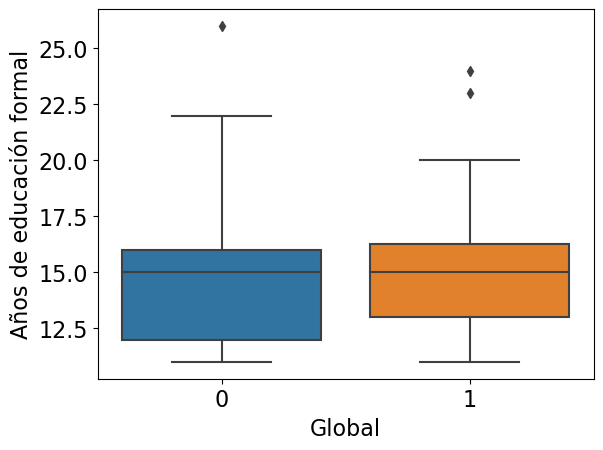

In [24]:
sns.boxplot(x='Global', y='Años de educación formal', data=df)

In [25]:
#df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= radius_mean <= (@Q3 + 1.5 * @IQR)')
#df_filtered.shape

In [26]:
dl_benign = df[df['diagnosis'] =='B']['radius_mean']

above = dl_benign[dl_benign < (Q1 - 1.5*IQR)].values 
below = dl_benign[dl_benign > (Q1 + 1.5*IQR)].values
len(np.concatenate([above,below], axis = 0))
np.concatenate([above,below], axis = 0)

KeyError: 'diagnosis'

#### Correlation:

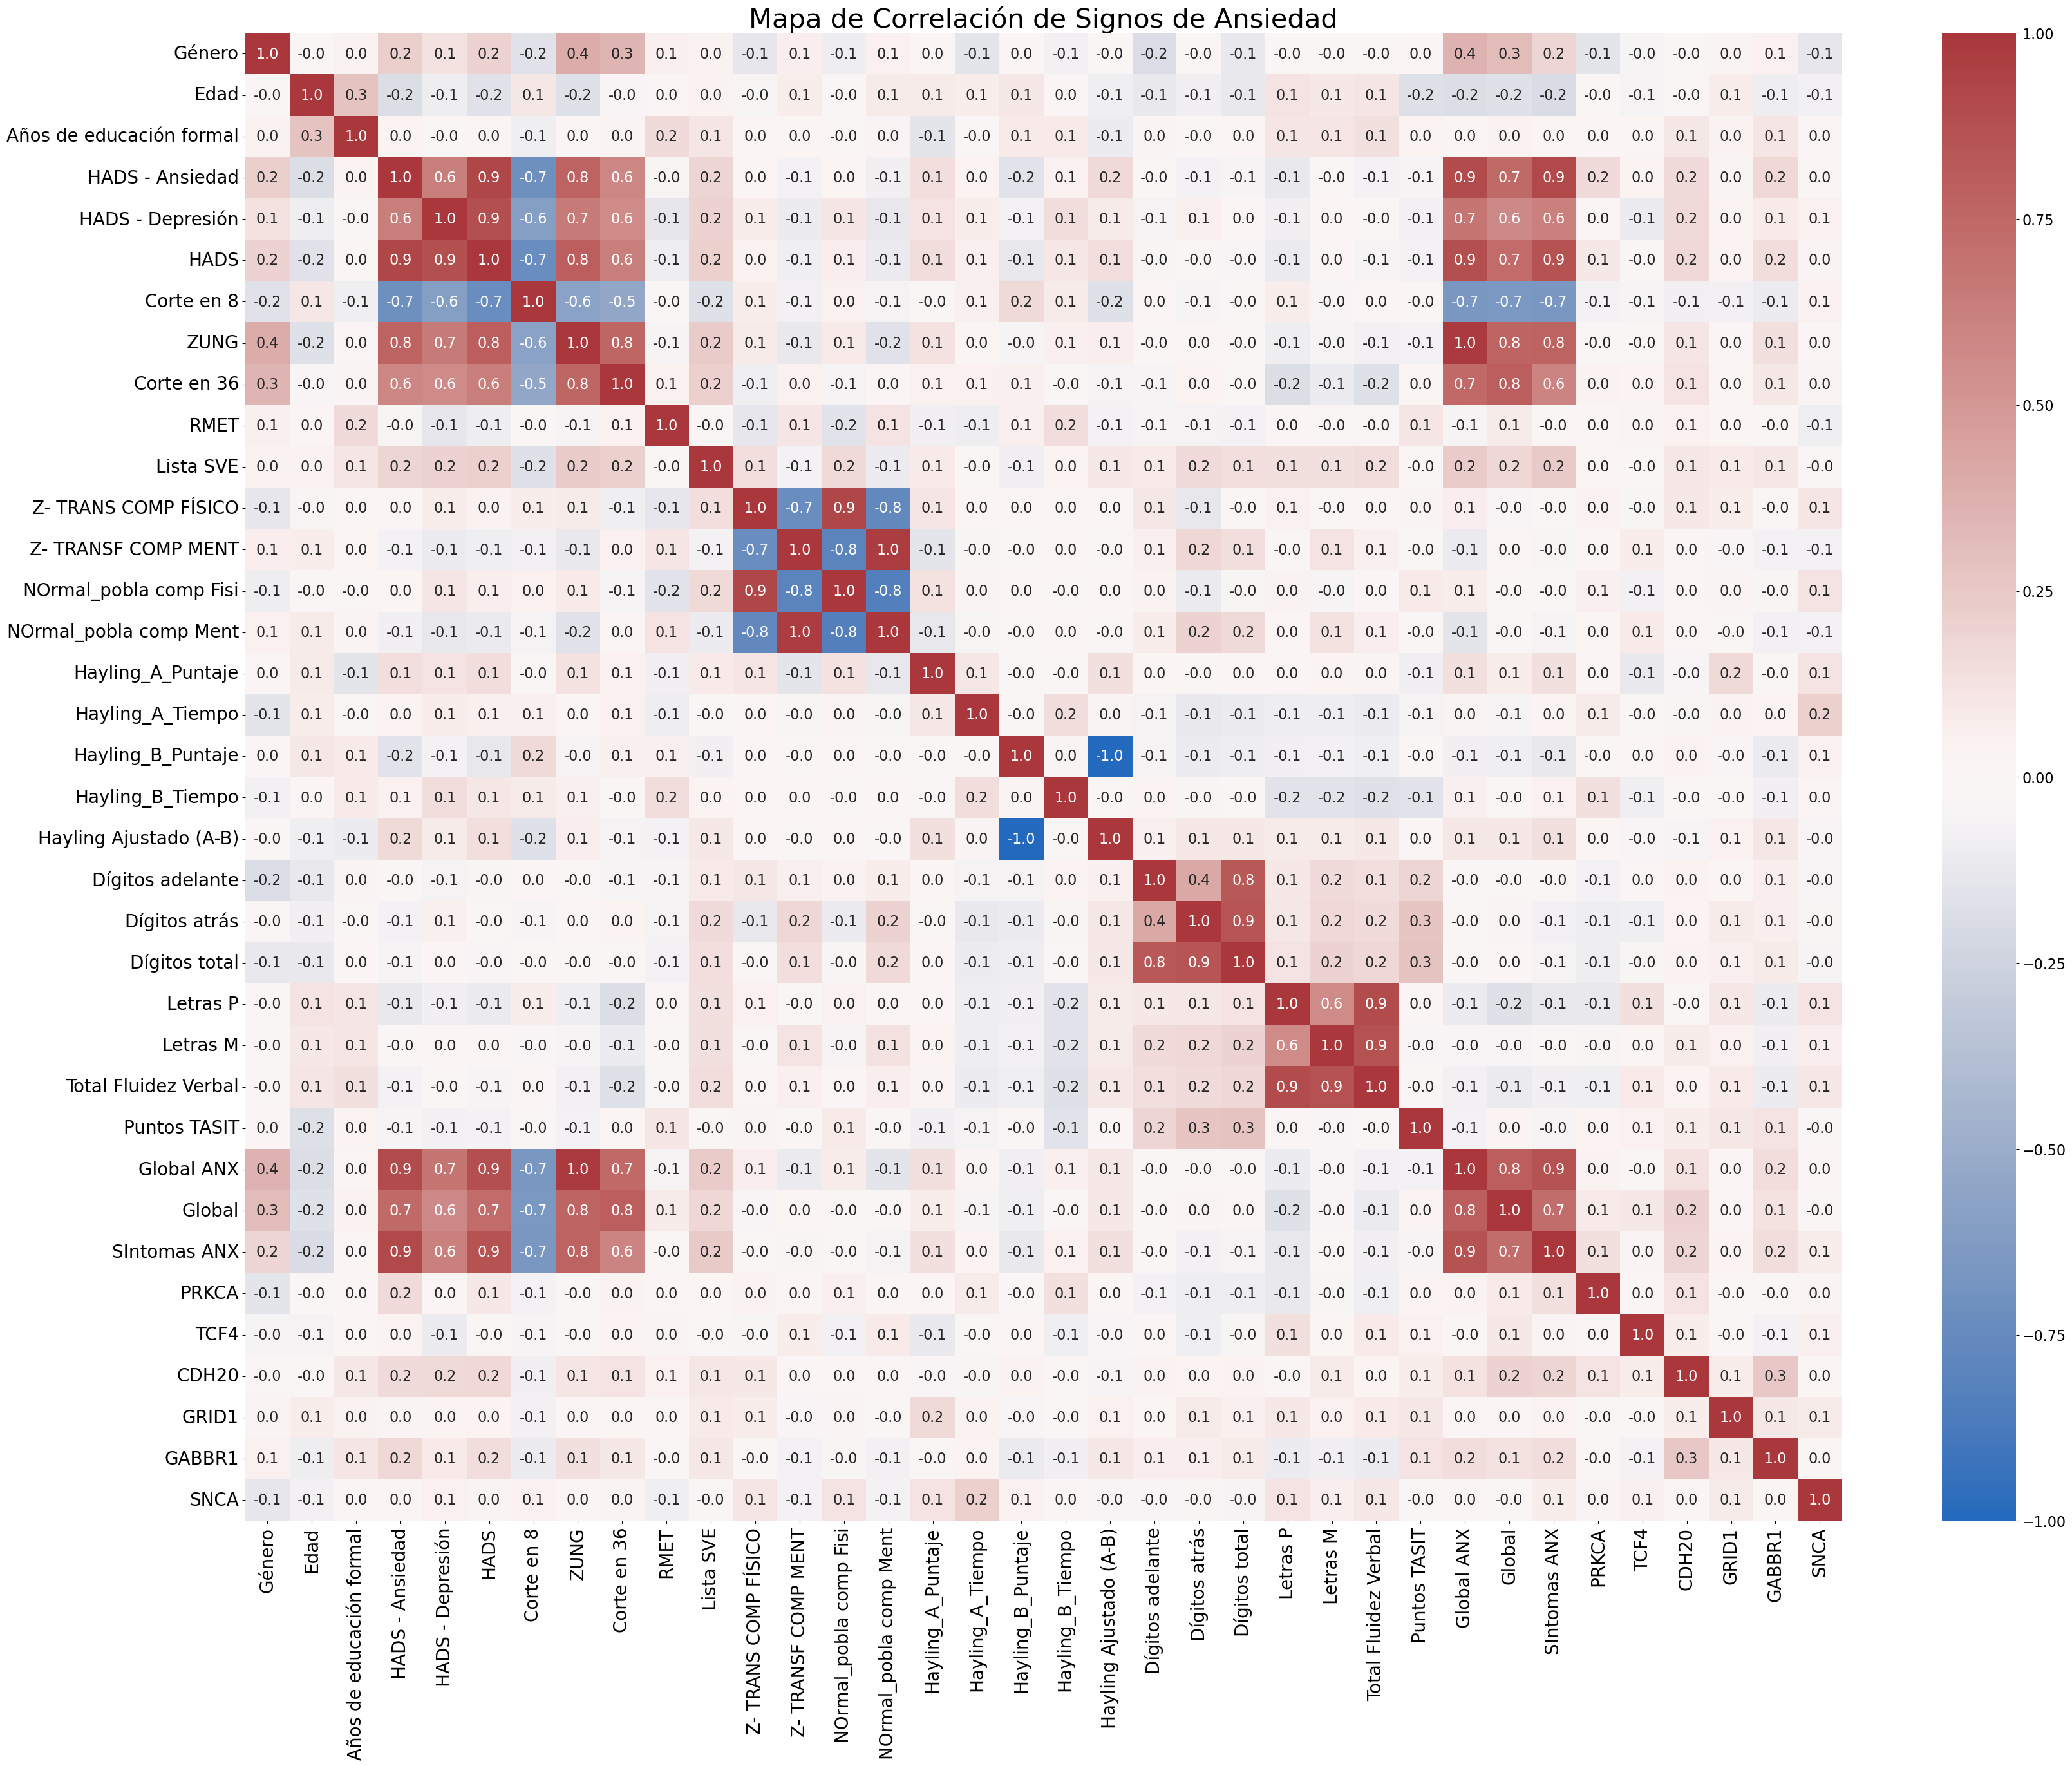

In [27]:
# Crear el mapa de calor de correlación
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True, fmt=".1f", ax=ax, vmin=-1, vmax=1, center=0, cmap='vlag')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Mapa de Correlación de Signos de Ansiedad', fontsize=30)
plt.show()

In [28]:
corr_matrix=df.corr()

In [29]:
corr_matrix

,Género,Edad,Años de educación formal,HADS - Ansiedad,HADS - Depresión,HADS,Corte en 8,ZUNG,Corte en 36,RMET,...,Puntos TASIT,Global ANX,Global,SIntomas ANX,PRKCA,TCF4,CDH20,GRID1,GABBR1,SNCA
Género,1.000000,-0.027710,0.041386,0.223447,0.129275,0.200804,-0.161231,0.397617,0.343971,0.060418,...,0.006251,0.360667,0.313611,0.194609,-0.147159,-0.046959,-0.005588,0.027287,0.053630,-0.138493
Edad,-0.027710,1.000000,0.275349,-0.185635,-0.096165,-0.161358,0.106641,-0.167154,-0.034871,0.012099,...,-0.178030,-0.181744,-0.167304,-0.201028,-0.000313,-0.059446,-0.014093,0.077011,-0.100654,-0.073852
Años de educación formal,0.041386,0.275349,1.000000,0.035070,-0.004990,0.019215,-0.086800,0.004817,0.029124,0.159067,...,0.034782,0.015001,0.045426,0.005406,0.011100,0.018863,0.105910,0.043916,0.117167,0.014216
HADS - Ansiedad,0.223447,-0.185635,0.035070,1.000000,0.636604,0.926917,-0.712247,0.779786,0.591130,-0.046401,...,-0.050555,0.891867,0.735744,0.908979,0.160029,0.037732,0.159654,0.023769,0.176081,0.009121
HADS - Depresión,0.129275,-0.096165,-0.004990,0.636604,1.000000,0.879482,-0.601653,0.652759,0.566149,-0.136442,...,-0.073710,0.680720,0.574693,0.618486,0.002328,-0.104626,0.165388,0.034638,0.089489,0.051190
HADS,0.200804,-0.161358,0.019215,0.926917,0.879482,1.000000,-0.732325,0.798875,0.640303,-0.095029,...,-0.067068,0.881651,0.733707,0.861928,0.099893,-0.027626,0.179008,0.031524,0.152212,0.030538
Corte en 8,-0.161231,0.106641,-0.086800,-0.712247,-0.601653,-0.732325,1.000000,-0.584991,-0.541819,-0.022636,...,-0.021579,-0.656608,-0.653813,-0.663908,-0.069677,-0.050286,-0.080453,-0.077210,-0.106650,0.054070
ZUNG,0.397617,-0.167154,0.004817,0.779786,0.652759,0.798875,-0.584991,1.000000,0.764086,-0.051463,...,-0.065723,0.978624,0.769584,0.777906,-0.008671,-0.020849,0.109506,0.006239,0.134672,0.010311
Corte en 36,0.343971,-0.034871,0.029124,0.591130,0.566149,0.640303,-0.541819,0.764086,1.000000,0.052728,...,0.021136,0.746211,0.798570,0.601821,0.046290,0.031338,0.122315,0.018876,0.100407,0.028559
RMET,0.060418,0.012099,0.159067,-0.046401,-0.136442,-0.095029,-0.022636,-0.051463,0.052728,1.000000,...,0.113751,-0.052423,0.084710,-0.024848,0.009406,0.028523,0.050616,0.017514,-0.008678,-0.093389


In [30]:
corr_matrix['Global']

Género                      0.313611
Edad                       -0.167304
Años de educación formal    0.045426
HADS - Ansiedad             0.735744
HADS - Depresión            0.574693
HADS                        0.733707
Corte en 8                 -0.653813
ZUNG                        0.769584
Corte en 36                 0.798570
RMET                        0.084710
Lista SVE                   0.187007
Z- TRANS COMP FÍSICO       -0.036413
Z- TRANSF COMP MENT         0.021230
NOrmal_pobla comp Fisi     -0.017592
NOrmal_pobla comp Ment     -0.009065
Hayling_A_Puntaje           0.077486
Hayling_A_Tiempo           -0.053664
Hayling_B_Puntaje          -0.085976
Hayling_B_Tiempo           -0.026474
Hayling Ajustado (A-B)      0.094496
Dígitos adelante           -0.016691
Dígitos atrás               0.029081
Dígitos total               0.008096
Letras P                   -0.171777
Letras M                   -0.036868
Total Fluidez Verbal       -0.116683
Puntos TASIT                0.032412
G

In [31]:
corr_matrix['Sintomas ANX']

KeyError: 'Sintomas ANX'

#### Remove Correlations:

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]


In [ ]:
to_drop

In [ ]:
f,ax=plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax, annot_kws={"fontsize":20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

In [ ]:
df.columns

#### Model Development & Validation:

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=99)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
clf.feature_importances_

In [ ]:
df.columns

In [ ]:
y_pred= clf.predict(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=10)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_pred, y_test))

In [ ]:
features=df.columns
importances=clf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
#KNN

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [67]:
print (len(df))
print (df.head())

169
   Género  Edad  Años de educación formal  HADS - Ansiedad  HADS - Depresión  \
0       1    24                        11               17                 9   
1       1    23                        15                8                 2   
2       0    26                        17                7                 2   
3       0    34                        18                7                 4   
4       0    29                        11                3                 4   

   HADS  Corte en 8  ZUNG  Corte en 36  RMET  ...  Puntos TASIT  Global ANX  \
0    26           0    57            1    12  ...             8          74   
1    10           0    47            1    12  ...             7          55   
2     9           0    33            0    12  ...             9          40   
3    11           0    33            0     9  ...             8          40   
4     7           1    36            1    11  ...             8          39   

   Global  SIntomas ANX  PRKCA  TCF4  CD

In [68]:
x = df.iloc[:, 0:36]
y = df.iloc[:, 6]
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0, test_size=0.2)

In [69]:
sc_x=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.transform(x_test)

In [70]:
import math 
math.sqrt(len(y_test))

5.830951894845301

In [71]:
classifier= KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [72]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [73]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [74]:
cm=confusion_matrix(y_test, y_pred)
print (cm)

[[23  0]
 [ 1 10]]


In [75]:
print (f1_score(y_test, y_pred))

0.9523809523809523


In [76]:
print (accuracy_score(y_test, y_pred))

0.9705882352941176


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

NameError: name 'X' is not defined

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)

NameError: name 'X_scaled' is not defined

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

gnb_pred = gnb_clf.predict(X_test)
print(accuracy_score(gnb_pred, y_test))

NameError: name 'X_train' is not defined

In [60]:
from sklearn.metrics import classification_report
print(classification_report(gnb_pred, y_test))

NameError: name 'gnb_pred' is not defined

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42, max_depth=1)
rfc_clf.fit(X_train, y_train)

rfc_pred = rfc_clf.predict(X_test)
print(classification_report(rfc_pred, y_test))

NameError: name 'X_train' is not defined

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42, max_depth=4)
rfc_clf.fit(X_train, y_train)

rfc_pred = rfc_clf.predict(X_test)
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           1       0.83      0.56      0.67        36
           2       0.15      0.29      0.20         7
           3       0.00      0.00      0.00         0

    accuracy                           0.51        43
   macro avg       0.33      0.28      0.29        43
weighted avg       0.72      0.51      0.59        43



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Saving and Loading the Scaler:

In [77]:
import pickle
pickle.dump(scaler, open("../../models/ch5_scaler.pickle", 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: '../../models/ch5_scaler.pickle'

In [ ]:
loaded_scaler = pickle.load(open("../../models/ch5_scaler.pickle", 'rb'))

In [ ]:
scaler == loaded_scaler

In [ ]:
scaler.scale_ == loaded_scaler.scale_

#### Saving and Loading the Model:

In [ ]:
import pickle
pickle.dump(gnb_clf, open("../../models/ch5_gnb_clf.pickle", 'wb'))

In [ ]:
loaded_gnb_clf = pickle.load(open("../../models/ch5_gnb_clf.pickle", 'rb'))
loaded_gnb_clf.score(X_test, y_test)